In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy().astype('float64')
y = mnist.target.to_numpy().astype('int')


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Normalize the data to the range [0, 1]
X /= 255.0


In [4]:
# Use a subset of the data for quicker computation (e.g., 5000 samples)
np.random.seed(42)
indices = np.random.choice(X.shape[0], 5000, replace=False)
X_subset = X[indices]
y_subset = y[indices]


In [5]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)


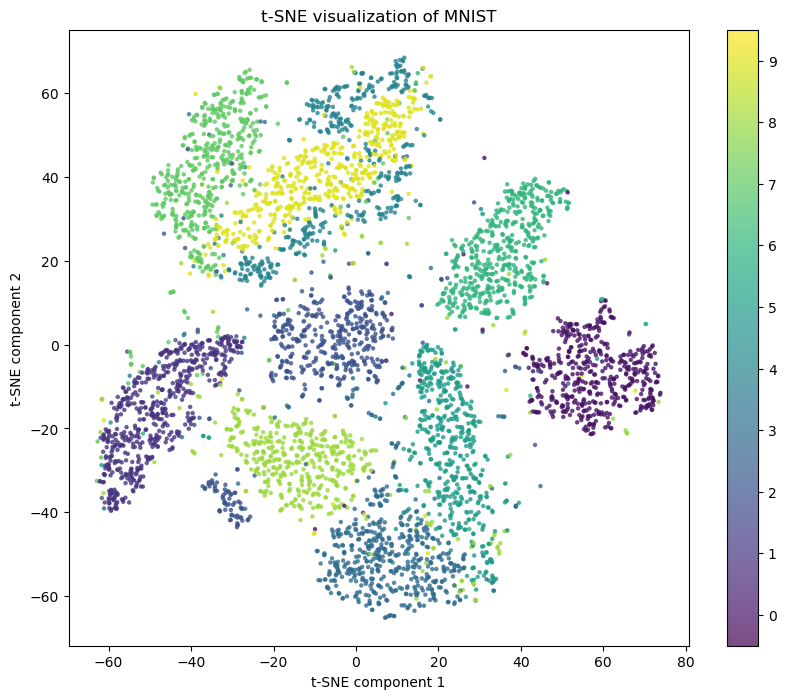

In [20]:
# Visualize the result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='viridis', s=5, alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title("t-SNE visualization of MNIST")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

In [15]:
X_tsne.shape

(5000, 2)

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
#Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_tsne)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_tsne, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.47


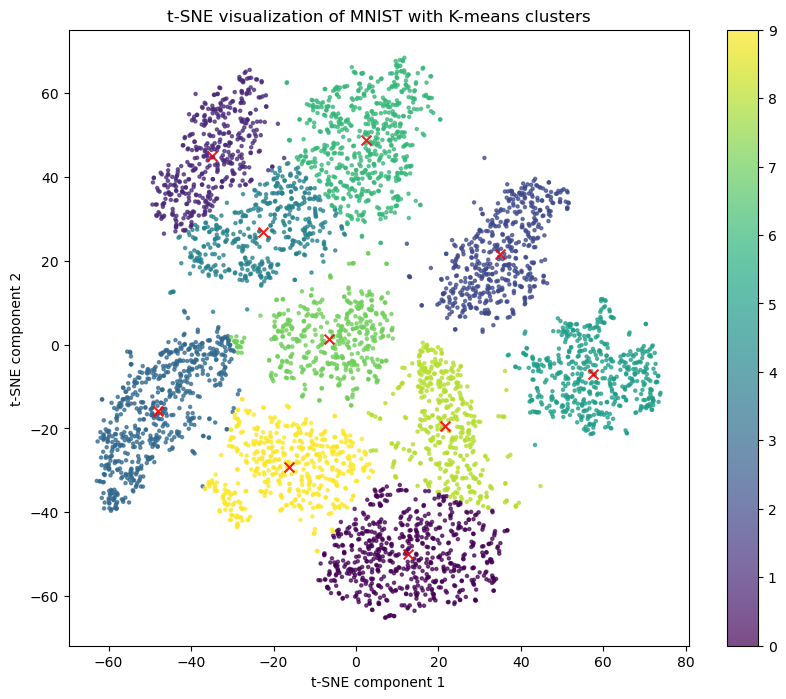

In [10]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, cmap='viridis', s=5, alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.9, marker='x')
plt.colorbar(scatter)
plt.title("t-SNE visualization of MNIST with K-means clusters")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_subset)

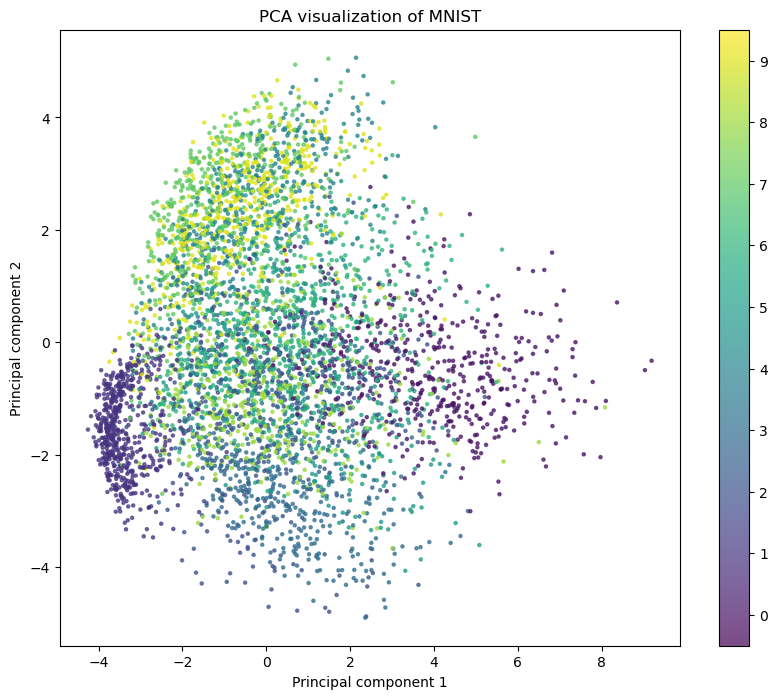

In [17]:
# Visualize the result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset, cmap='viridis', s=5, alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title("PCA visualization of MNIST")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()

In [13]:
#Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_pca, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.36


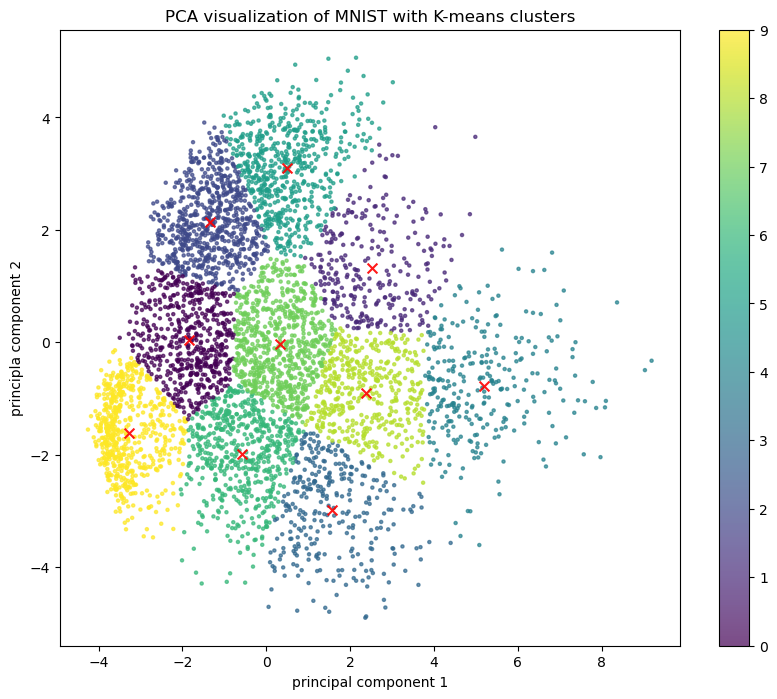

In [16]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=5, alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.9, marker='x')
plt.colorbar(scatter)
plt.title("PCA visualization of MNIST with K-means clusters")
plt.xlabel("principal component 1")
plt.ylabel("principla component 2")
plt.show()